Import common libraries

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Set default plot size

In [73]:
%matplotlib inline

plt.rcParams['figure.figsize'] = (12.0, 8.0)

Load title.basics data

In [2]:
title_basics = pd.read_csv('title.basics.tsv', delimiter='\t', encoding='utf-8')

title_basics.head(10)

/Users/xinhezhang/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,\N,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,Short
5,tt0000006,short,Chinese Opium Den,Chinese Opium Den,0,1894,\N,1,Short
6,tt0000007,short,Corbett and Courtney Before the Kinetograph,Corbett and Courtney Before the Kinetograph,0,1894,\N,1,"Short,Sport"
7,tt0000008,short,Edison Kinetoscopic Record of a Sneeze,Edison Kinetoscopic Record of a Sneeze,0,1894,\N,1,"Documentary,Short"
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance
9,tt0000010,short,Employees Leaving the Lumière Factory,La sortie de l'usine Lumière à Lyon,0,1895,\N,1,"Documentary,Short"


Only keep movie related data

In [3]:
title_basics_movie = title_basics[title_basics['titleType'] == 'movie']

title_basics_movie.head(10)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance
145,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,\N,20,"Documentary,News,Sport"
332,tt0000335,movie,Soldiers of the Cross,Soldiers of the Cross,0,1900,\N,\N,"Biography,Drama"
499,tt0000502,movie,Bohemios,Bohemios,0,1905,\N,100,\N
571,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Biography,Crime,Drama"
611,tt0000615,movie,Robbery Under Arms,Robbery Under Arms,0,1907,\N,\N,Drama
626,tt0000630,movie,Hamlet,Amleto,0,1908,\N,\N,Drama
669,tt0000675,movie,Don Quijote,Don Quijote,0,1908,\N,\N,Drama
670,tt0000676,movie,Don Álvaro o la fuerza del sino,Don Álvaro o la fuerza del sino,0,1908,\N,\N,Drama
673,tt0000679,movie,The Fairylogue and Radio-Plays,The Fairylogue and Radio-Plays,0,1908,\N,120,"Adventure,Fantasy"


In [4]:
print "Number of movies:", title_basics_movie.shape[0]
print "Number of features:", title_basics_movie.shape[1]

Number of movies: 478145
Number of features: 9


Get moive uid(tconst)

In [5]:
uid = title_basics_movie['tconst']

uid.head(10)

8      tt0000009
145    tt0000147
332    tt0000335
499    tt0000502
571    tt0000574
611    tt0000615
626    tt0000630
669    tt0000675
670    tt0000676
673    tt0000679
Name: tconst, dtype: object

Load title.rating data

In [6]:
title_ratings = pd.read_csv('title.ratings.tsv', delimiter='\t', encoding='utf-8')

title_ratings.head(10)

,tconst,averageRating,numVotes
0,tt0000001,5.8,1350
1,tt0000002,6.5,157
2,tt0000003,6.6,934
3,tt0000004,6.4,93
4,tt0000005,6.2,1622
5,tt0000006,5.7,80
6,tt0000007,5.5,544
7,tt0000008,5.6,1441
8,tt0000009,5.4,62
9,tt0000010,6.9,4851


In [7]:
title_ratings_movie = title_ratings[title_ratings['tconst'].isin(uid.values)]

title_ratings_movie.head(10)

,tconst,averageRating,numVotes
8,tt0000009,5.4,62
141,tt0000147,5.2,246
232,tt0000335,6.2,32
331,tt0000574,6.3,431
347,tt0000615,5.1,12
353,tt0000630,2.9,8
380,tt0000675,4.7,7
381,tt0000676,4.0,6
382,tt0000679,6.1,24
412,tt0000739,7.2,6


Top 10 highest rating movies with votes over 100000

In [22]:
rating10 = title_ratings_movie[title_ratings_movie['numVotes'] > 100000].sort_values(['averageRating'], ascending=[0]).head(10)
uid10 = rating10['tconst'].values

rating10 = rating10['averageRating'].values

rating10

array([ 9.3,  9.2,  9. ,  9. ,  8.9,  8.9,  8.9,  8.9,  8.9,  8.8])

Top 10 highest rating movies with votes over 100000 (sorted)

In [18]:
#movie10 = title_basics_movie[title_basics_movie['tconst'].isin(uid10)]['primaryTitle']
movie10 = list()
for i in uid10:
    movie10.append(title_basics_movie[title_basics_movie['tconst'] == i]['primaryTitle'].values[0].encode('ascii','ignore'))
    
movie10

['The Shawshank Redemption',
 'The Godfather',
 'The Dark Knight',
 'The Godfather: Part II',
 'Pulp Fiction',
 '12 Angry Men',
 "Schindler's List",
 'The Lord of the Rings: The Return of the King',
 'The Good, the Bad and the Ugly',
 'Inception']

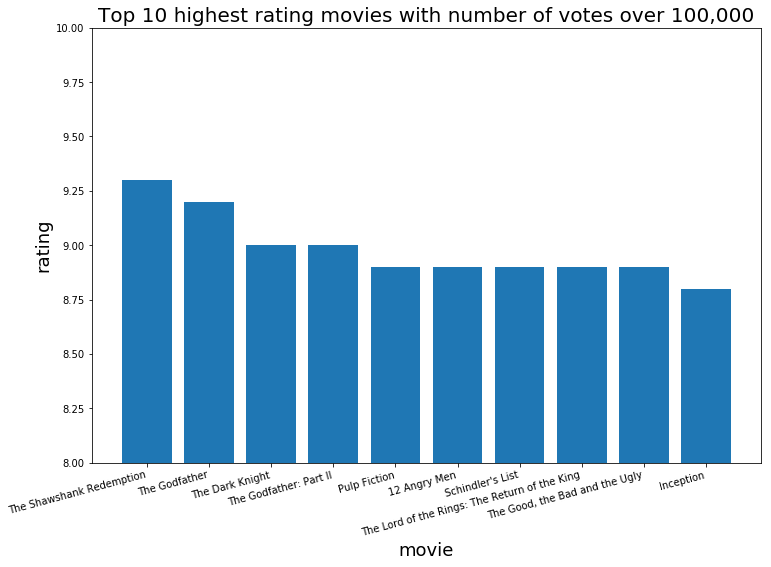

In [72]:
fig, ax = plt.subplots()

ax.bar(np.arange(10), rating10, tick_label=movie10)
ax.set_title('Top 10 highest rating movies with number of votes over 100,000', fontsize=20)
ax.set_xlabel('movie', fontsize=18)
ax.set_ylabel('rating', fontsize=18)
ax.set_ylim(8, 10)

plt.setp(ax.get_xticklabels(), rotation=15, horizontalalignment='right')

#plt.savefig('top10movies.png')
plt.show()